In [1]:
import pandas as pd
import requests
from bs4 import BeautifulSoup as BS
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
from pylab import rc, rcParams
import seaborn as sns
from matplotlib.pyplot import figure
import re

pd.options.display.max_rows = 1500
pd.options.display.max_columns = 1500

%matplotlib inline

In [2]:
# create a Request object for the wikipedia page for the Turing Award
response = requests.get('https://en.wikipedia.org/wiki/List_of_disasters_by_cost')

# read the resulting HTML into a variable called result_text
result_text = response.text

In [3]:
print(type(response))
print(type(result_text))

<class 'requests.models.Response'>
<class 'str'>


In [4]:
earthquake_US = BS(result_text, 'lxml')

In [5]:
earthquake_US.findAll('tr', limit=2)[1].findAll('th') 

[<th>Cost in billions <a class="mw-redirect" href="/wiki/United_States_dollars" title="United States dollars">USD</a>
 </th>,
 <th>Cost (2017-2018)<sup class="reference" id="cite_ref-2"><a href="#cite_note-2">[2]</a></sup>
 </th>,
 <th data-sort-type="number">Fatalities
 </th>,
 <th>Event
 </th>,
 <th>Type
 </th>,
 <th>Year
 </th>,
 <th>Nation
 </th>]

In [6]:
column_headers = [th.getText() for th in 
                  earthquake_US.findAll('tr', limit=2)[1].findAll('th')]

In [7]:
column_headers

['Cost in billions USD\n',
 'Cost (2017-2018)[2]\n',
 'Fatalities\n',
 'Event\n',
 'Type\n',
 'Year\n',
 'Nation\n']

In [8]:
data = []
table = earthquake_US.find('table', class_ ="wikitable sortable")
table_body = table.find('tbody')

rows = table_body.find_all('tr')[2:]
for row in rows:
    
    cols = row.find_all('td')
    cols = [col.text.strip() for col in cols]
    data.append(cols)   

In [9]:
cost = pd.DataFrame(data, columns=column_headers)
cost.columns = ['Cost in Billions','cost 2017 to 2018','Fatalities', 'Event','Type', 'Year', 'Nation']
cost.head()

,Cost in Billions,cost 2017 to 2018,Fatalities,Event,Type,Year,Nation
0,$360[3],$411.3,15894,2011 Tōhoku earthquake and tsunami,"Earthquake, Tsunami",2011,Japan
1,$197[4],$329.8,5502 – 6434,Great Hanshin earthquake,Earthquake,1995,Japan
2,$148[5],$176.4,87587,2008 Sichuan earthquake,Earthquake,2008,China
3,$125[6],$164.9,1245 – 1836,Hurricane Katrina,Tropical cyclone,2005,United States
4,$125[6],$129.5,107,Hurricane Harvey,Tropical cyclone,2017,United States


In [10]:
cost['Cost in Billions'].unique()

array(['$360[3]', '$197[4]', '$148[5]', '$125[6]', '≥$91.6[6]',
       '$68.7[6]', '$64.8[6]', '$60 – $100[8]', '$53.25[9]',
       '$49.6 – $56.1[10]', '$49[11]', '$45.7[12]',
       '$40[citation needed][13]', '$50 – $433[14]', '$38[6]',
       '$28[15][16]', '$27.4[6]', '$27.3[6]', '$26.1[6]', '$25.1[17]',
       '$24.0[10]', '$21.8 – $135[18]', '$18.5[6]', '$19.2', '$17.6[19]',
       '$16.9[6]', '$15.8[20]', '$15.1[21][22]', '$15 – $20[23]',
       '$15.0[24]', '$15[1]', '$14.2[6]', '>$13[25]', '$12.9[26]',
       '$12.7[27]', '$11.6 – $18.9[28]', '$10.4[29]', '$10.2[10]',
       '$10 – $15[30]', '$10[10]', '$10[31]', '$10[24]',
       '$9.8[6][32][33][34]', '$9.5[6]', '$9.5[35][36]', '$9.4[6]',
       '$9.4[37]', '$9[38]', '$8.5[6]', '8.3[6]', '$8.1[39] – $14[40]',
       '$7.9[6]', '$7.13[41]', '$7[42]', '$6.5[6]', '$6.2[43]',
       '$6.2[44]', '$6.1[6]', '$6.1[24]', '$6.01[45]', '$6[24]', '$6[46]',
       '$5.5[24]', '$5.5[6]', '$5[47]', '$5[48]', '$4.7[6]',
       '$4.6[49][5

In [11]:
cost['cost 2017 to 2018'].unique()

array(['$411.3', '$329.8', '$176.4', '$164.9', '$129.5', '≥$94.9',
       '$76.3', '$66.5', '$69.7 – $116.1', '$115.8', '$53.3 – $60.3',
       '$81', '$49.8', '$44.6', '$113 – ~$700', '$43.3', '$36.2', '$34.4',
       '$47.6', '$33.9', '$25.1', '$24.5', '$30.2 – $186.9', '$23.2',
       '$24.6', '$23.9', '$21.9', '$17', '$15.4', '$25.6 – $34.1',
       '$28.8', '$19.4', '$15.5', '>$13', '$14.7', '$13.2', '$17 – $27.7',
       '$11', '$11.1', '$10.3 – $15.4', '$29.6', '$18', '$12.1', '$11.3',
       '$12.7', '$18.7', '$9.7', '$14.1', '$9.4', '$11.7', '$11.8',
       '$9.5', '$9.2 – $16', '$10.3', '$7.4', '$13.8', '$9.6', '$6.2',
       '$7.1', '$9.1', '$7', '$8.6', '$7.01', '$6.3', '$7.3', '$11.4',
       '$7.9', '$7.6', '$4.8', '$5.2', '$4.4', '$5.8', '$8.8', '$6.9',
       '$5.4', '$2 – $4', '$3.1', '$2.9', '$3.7', '$2.5', '$2.2', '$2.1',
       '$1.4', '$1.7 – $2.7', '$3.8', '$2.3', '$0.9', '$3.6 – $4.9',
       '$0.9 – $1.4', '$1.3', '$0.8'], dtype=object)

In [12]:
def replace_characters(i):
    """ This function replaces special characters, 
    fills with empty string"""
    replace = re.sub('(\[.+)', "",i)
    replace = re.sub('(\$)', "", replace)
    replace = re.sub('(\≥)', "", replace)
    replace = re.sub('(\>)', "", replace)
    replace = re.sub('(\s+\(.+)', "", replace)
    replace = re.sub('(\+)', "", replace)
    replace = re.sub('(\~)', "", replace)
    return replace
    
def number_split(i):
    """" Split the numbers in the column
         with a hyphen and take the average of 
        two numbers and return the average"""
         
    average = 0
    splt = i.split('–')
    if len(splt)==2:
        first = float(splt[0])
        second = float(splt[1])
        average = (first+second)/2
    else:
        average = float(splt[0])
   
    return average

In [13]:
cost['Cost in Billions'] = cost['Cost in Billions'].apply(replace_characters)
cost['cost 2017 to 2018'] = cost['cost 2017 to 2018'].apply(replace_characters)
cost['Fatalities'] = cost['Fatalities'].apply(replace_characters)
cost['Nation']= cost['Nation'].apply(replace_characters)
cost['Cost in Billions 1'] = cost['Cost in Billions'].apply(number_split)
cost['cost 2017 to 2018 1']= cost['cost 2017 to 2018'].apply(number_split)
cost['Fatalities']= cost['Fatalities'].apply(number_split)

In [14]:
cost.head()

,Cost in Billions,cost 2017 to 2018,Fatalities,Event,Type,Year,Nation,Cost in Billions 1,cost 2017 to 2018 1
0,360,411.3,15894.0,2011 Tōhoku earthquake and tsunami,"Earthquake, Tsunami",2011,Japan,360.0,411.3
1,197,329.8,5968.0,Great Hanshin earthquake,Earthquake,1995,Japan,197.0,329.8
2,148,176.4,87587.0,2008 Sichuan earthquake,Earthquake,2008,China,148.0,176.4
3,125,164.9,1540.5,Hurricane Katrina,Tropical cyclone,2005,United States,125.0,164.9
4,125,129.5,107.0,Hurricane Harvey,Tropical cyclone,2017,United States,125.0,129.5


In [15]:
cost['Type']= cost['Type'].str.capitalize()

In [16]:
cost_billions = cost[['Year', 'Type','Cost in Billions 1','Nation','Fatalities']]\
.rename(columns={'Nation':'Country','Cost in Billions 1':'Cost in Billions','Fatalities':'Fatalities','Year':'Year','Type':'Disaster'})

In [17]:
cost_billions.head()

,Year,Disaster,Cost in Billions,Country,Fatalities
0,2011,"Earthquake, tsunami",360.0,Japan,15894.0
1,1995,Earthquake,197.0,Japan,5968.0
2,2008,Earthquake,148.0,China,87587.0
3,2005,Tropical cyclone,125.0,United States,1540.5
4,2017,Tropical cyclone,125.0,United States,107.0


In [18]:
#cost1.set_index('Nation', drop = False, inplace = True)

In [19]:
disaster_billions =cost_billions.groupby('Disaster')['Cost in Billions'].sum().sort_values(ascending= True)

In [20]:
disaster_billions

Disaster
Volcano                        1.70
Maritime disaster              2.00
Drought, wildfire              2.50
Explosion                      2.68
Severe storm                   2.90
Space flight accident          3.20
Hailstorm                      5.75
Tornado                       21.70
Wildfire                      46.12
European windstorm            64.20
Contamination (oil)           87.00
Terror attack                 91.10
Flood                        113.80
Drought                      116.10
Contamination (radiation)    242.60
Earthquake, tsunami          375.00
Earthquake                   515.35
Tropical cyclone             861.19
Name: Cost in Billions, dtype: float64

In [21]:

disaster_billions['Earthquake_total']= disaster_billions['Earthquake'] + disaster_billions['Earthquake, tsunami']

disaster_billions.drop(['Earthquake','Earthquake, tsunami'], inplace = True)
disaster_billions.head(100)

Disaster
Volcano                        1.70
Maritime disaster              2.00
Drought, wildfire              2.50
Explosion                      2.68
Severe storm                   2.90
Space flight accident          3.20
Hailstorm                      5.75
Tornado                       21.70
Wildfire                      46.12
European windstorm            64.20
Contamination (oil)           87.00
Terror attack                 91.10
Flood                        113.80
Drought                      116.10
Contamination (radiation)    242.60
Tropical cyclone             861.19
Earthquake_total             890.35
Name: Cost in Billions, dtype: float64

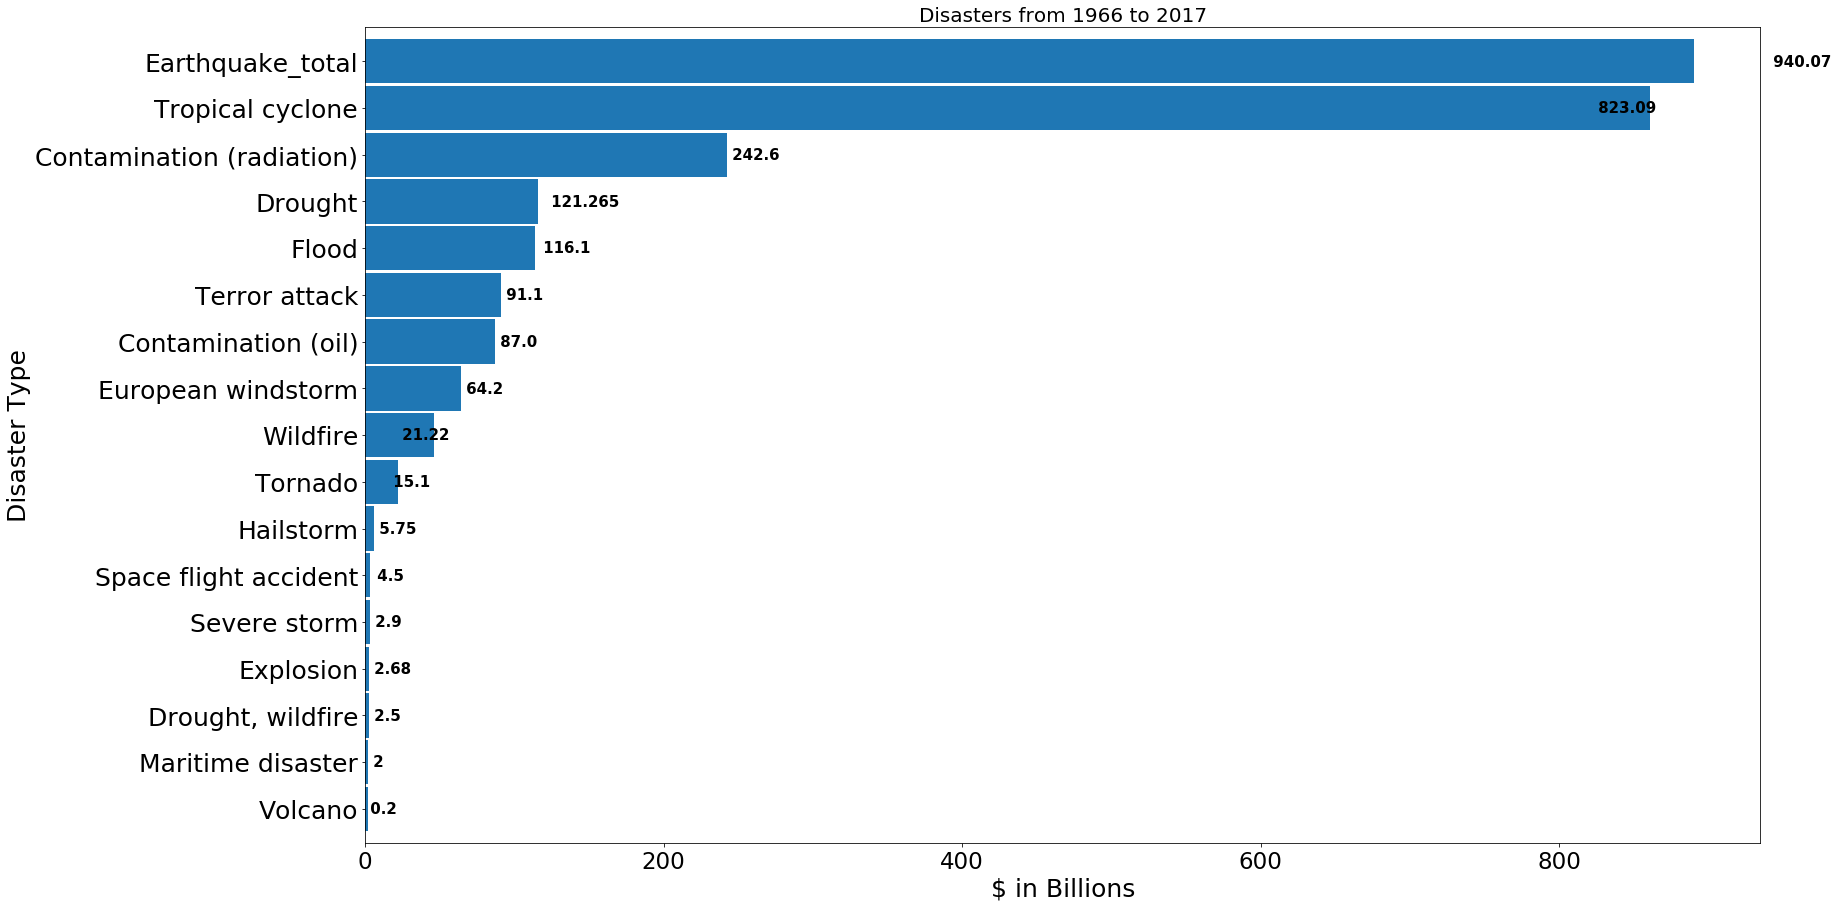

In [22]:
plt.figure(figsize=(25,15))
disaster_billions.plot.barh(width = 0.95)
Y = [0.2, 2, 2.5, 2.680,2.900,4.500,5.750,15.100,21.220,64.200,87.000,91.100,116.100,121.265,242.600,823.090,940.070]
plt.title("Disasters from 1966 to 2017", size = 20)
plt.ylabel('Disaster Type', fontsize=25)
plt.xlabel('$ in Billions', fontsize=25)
plt.xticks(size =23)
plt.yticks(size =25);

for i, value in enumerate(Y):
    plt.text(value, i, " "+str(value), color='black', va='center', fontweight='bold', fontsize = 15)
plt.savefig('billions3.pdf')

In [23]:
disaster_country =cost_billions.groupby('Disaster')[['Country']].sum()
disaster_country1 = cost_billions[(cost_billions['Disaster'] == "Earthquake, tsunami")] #& (cost1['Type'] == "Earthquake")
disaster_country2 = cost_billions[(cost_billions['Disaster'] == "Earthquake")]

disaster_country_merged = disaster_country1.merge(disaster_country2, how = 'outer')
disaster_country_merged=disaster_country_merged.groupby(['Country','Cost in Billions','Fatalities']).sum().reset_index().sort_values(ascending=False, by ='Cost in Billions')

In [24]:
# for dataframe plt.rcParams['figure.figsize'] = 15, 10 work for chaning figure size
disaster_country_merged

,Country,Cost in Billions,Fatalities,Year,Disaster
6,Japan,360.00,15894.0,2011,"Earthquake, tsunami"
5,Japan,197.00,5968.0,1995,Earthquake
0,China,148.00,87587.0,2008,Earthquake
12,United States,49.00,57.0,1994,Earthquake
9,New Zealand,40.00,185.0,2011,Earthquake
4,Japan,28.00,68.0,2004,Earthquake
3,Italy,15.80,27.0,2012,Earthquake
11,Turkey,15.25,17122.5,1999,Earthquake
10,Southeast Asia,15.00,255000.0,2004,"Earthquake, tsunami"
1,Haiti,8.10,160000.0,2010,Earthquake


In [25]:

cost_billions_country = disaster_country_merged.groupby('Country')['Cost in Billions'].sum().sort_values(ascending = True)



In [26]:
cost_billions_country.head(20)

Country
Iran Iraq           6.20
Mexico              8.00
Haiti               8.10
Southeast Asia     15.00
Turkey             15.25
Italy              15.80
New Zealand        40.00
United States      49.00
China             148.00
Japan             585.00
Name: Cost in Billions, dtype: float64

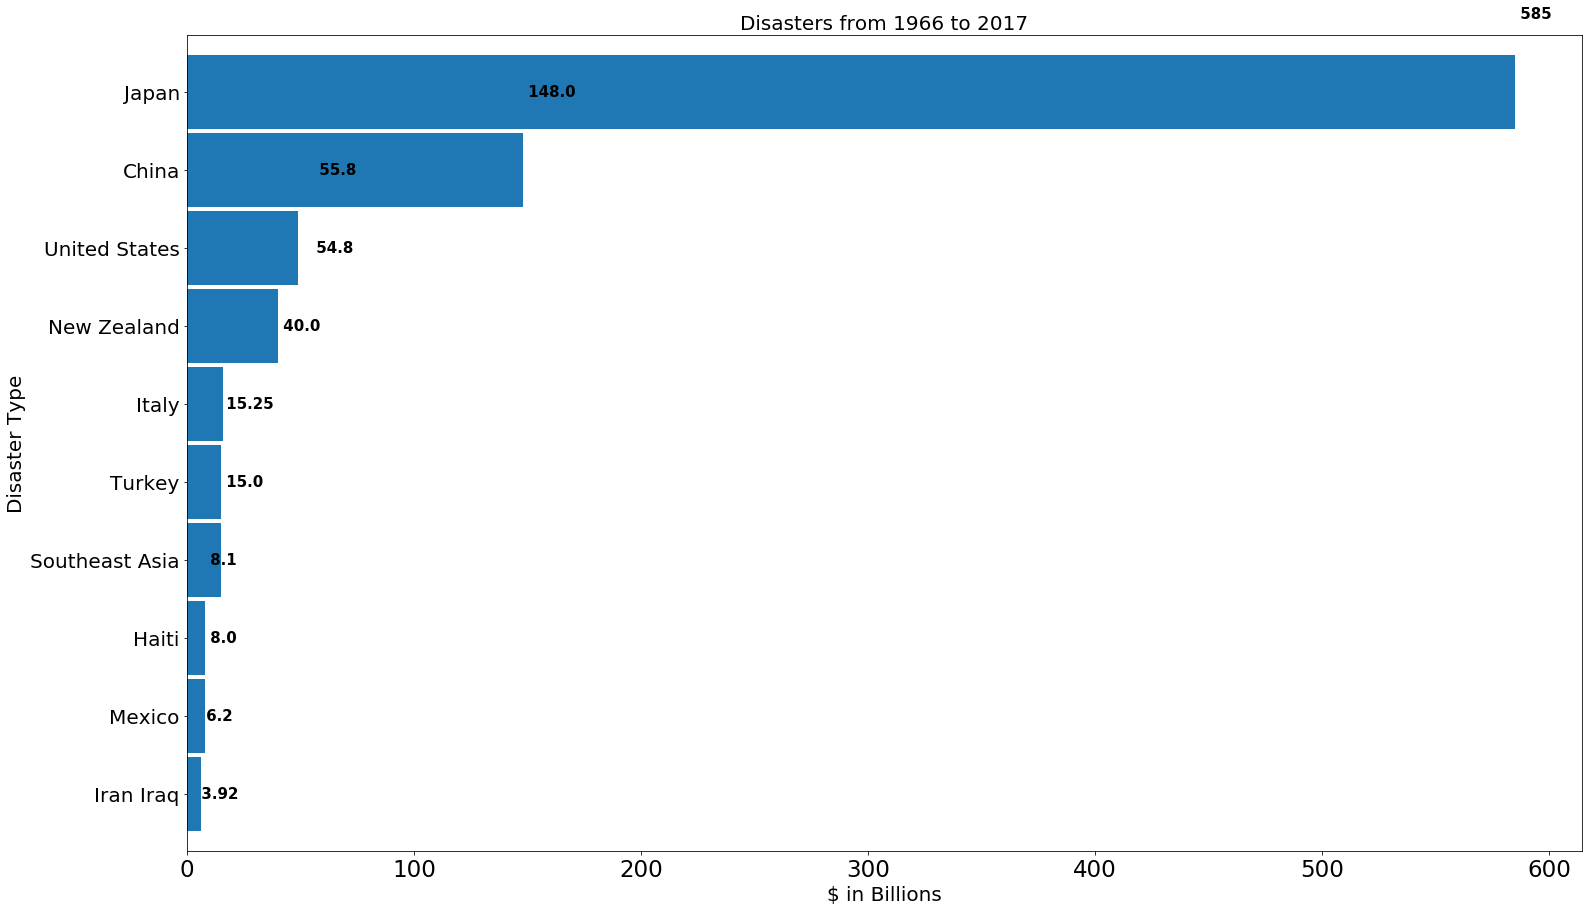

In [27]:
plt.figure(figsize=(25,15))
cost_billions_country.plot.barh(width = 0.95)
Y = [3.92,6.20,8.0,8.10,15.0,15.25,40.0,54.80,55.80,148.0,585]
plt.title("Disasters from 1966 to 2017", size = 20)
plt.ylabel('Disaster Type', fontsize=20)
plt.xlabel('$ in Billions', fontsize=20)
plt.xticks(size =23)
plt.yticks(size =20);

for i, value in enumerate(Y):
    plt.text(value, i, " "+str(value), color='black', va='center', fontweight='bold', fontsize = 15)
plt.savefig('countriesbillions.pdf')

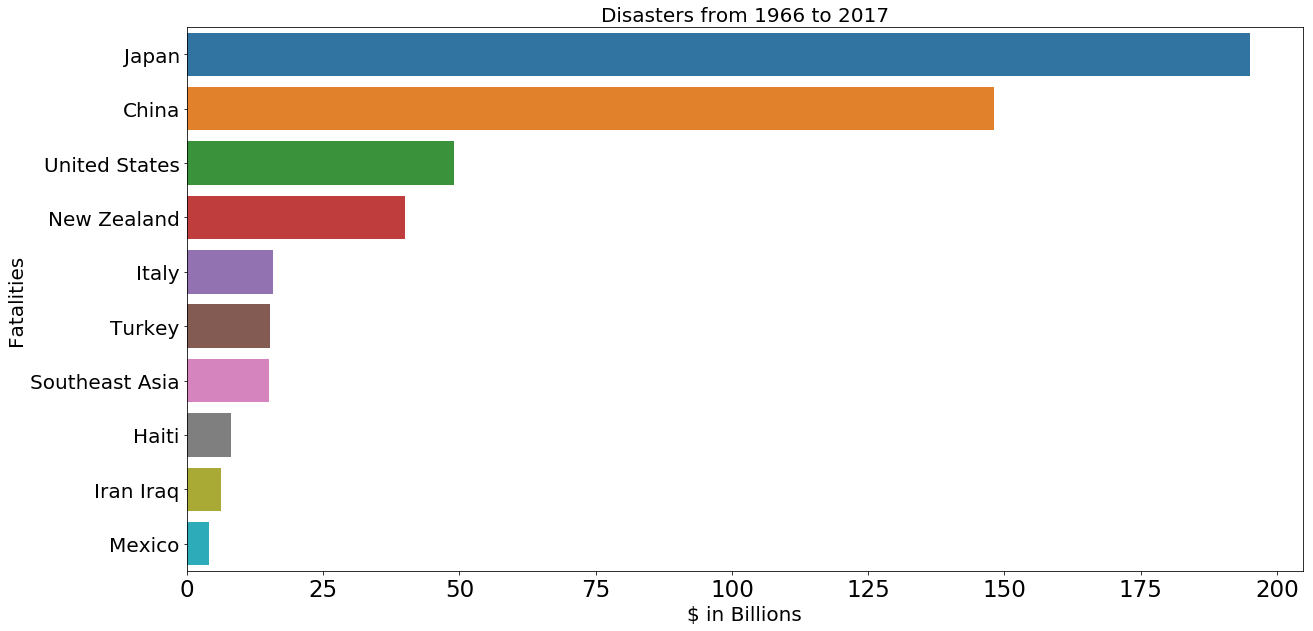

In [28]:
plt.figure(figsize=(20,10))
sns.barplot(y='Country', x= 'Cost in Billions',data=disaster_country_merged, ci=None)
plt.title("Disasters from 1966 to 2017", size = 20)
plt.ylabel('Fatalities', fontsize=20)
plt.xlabel('$ in Billions', fontsize=20)
plt.xticks(size =23)
plt.yticks(size =20);

